In [13]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[IP].src == '172.27.224.70' and pkt[IP].dst == '172.27.224.250' and pkt[TCP].dport == 502 and len(pkt[TCP].payload)>0):
                hmi_cube.append(d_time)
            if(pkt[IP].src == '172.27.224.250' and pkt[IP].dst == '172.27.224.70' and pkt[TCP].sport == 502 and len(pkt[TCP].payload)>0):
                plc_cube.append(d_time)

In [14]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/captures1_v2/captures1_v2/clean/eth2dump-clean-1h_1.pcap', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [15]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(hmi_cube)
#print(plc_cube[2][0])
#dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('172.27.224.70')]]
#dst2 = dst1[dst1[:,1]==[ip2long('172.27.224.250')]]
normal_hmi = hmi_cube
print(normal_hmi)

(11493,)
(11510,)
[1.53644007e+09 1.53644007e+09 1.53644007e+09 ... 1.53644367e+09
 1.53644367e+09 1.53644367e+09]
[1.53644007e+09 1.53644007e+09 1.53644007e+09 ... 1.53644367e+09
 1.53644367e+09 1.53644367e+09]


In [16]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[IP].src == '172.27.224.70' and pkt[IP].dst == '172.27.224.250' and pkt[TCP].dport == 502 and len(pkt[TCP].payload)>0):
                hmi_cube.append(d_time)
            if(pkt[IP].src == '172.27.224.250' and pkt[IP].dst == '172.27.224.70' and pkt[TCP].sport == 502 and len(pkt[TCP].payload)>0):
                plc_cube.append(d_time)

In [17]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/captures1_v2/captures1_v2/mitm/eth2dump-mitm-change-1m-1h_1.pcap', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [18]:
print(hmi_cube.shape)
print(plc_cube.shape)
attack_hmi = hmi_cube

(11485,)
(11503,)


In [19]:
print("normal HMI",normal_hmi.shape)
print("attack HMI",attack_hmi.shape)
print(max(normal_hmi)-min(normal_hmi))

normal HMI (11493,)
attack HMI (11485,)
3599.63831281662


In [20]:
normal_hmi_diff = np.diff(normal_hmi)
#normal_plc_diff = np.diff(normal_plc)
attack_hmi_diff = np.diff(attack_hmi)
#attack_plc_diff = np.diff(attack_plc)
print(normal_hmi_diff.shape)
print(max(normal_hmi_diff))
print(min(normal_hmi_diff))

(11492,)
5.279489994049072
0.23404502868652344


Time monitoring in seconds :  [62.43016791]
0.9999999999999991
0.9999999999999992
normal peaks time [[0.32742882]
 [0.31196499]
 [0.31199193]
 [0.3120172 ]]
attack peaks time [[0.31186318]
 [0.31196499]
 [0.31199193]
 [0.3120172 ]]
normal peaks density [0.00181756 0.05902621 0.45189165 0.01121024]
attack peaks density [0.00114518 0.0626833  0.44536714 0.011261  ]
Time monitoring in seconds :  [62.80455589]
0.9999999999999991
0.9999999999999992
normal peaks time [[0.31199002]
 [0.68657684]
 [0.31199193]
 [0.31201005]]
attack peaks time [[0.31199002]
 [0.68657684]
 [0.31199193]]
normal peaks density [0.13361129 0.35644609 0.02210005 0.00314676]
attack peaks density [0.10992385 0.38893817 0.01796598]
Time monitoring in seconds :  [62.50813603]
0.9999999999999991
0.9999999999999991
normal peaks time [[0.31199288]
 [0.31198502]
 [0.31199598]
 [0.32760692]]
attack peaks time [[0.29640698]
 [0.31199288]
 [0.31198502]
 [0.31199598]
 [0.32760692]]
normal peaks density [0.16506573 0.3089193  0.0

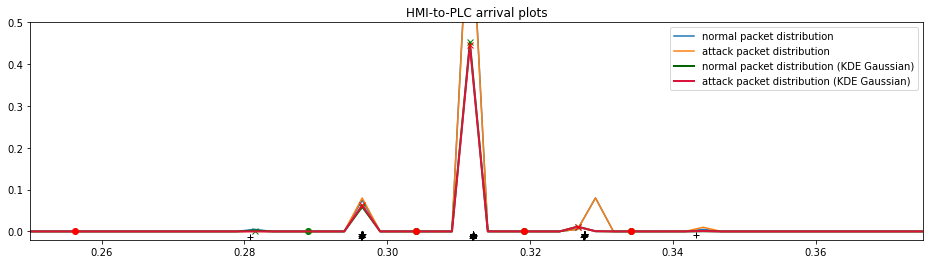

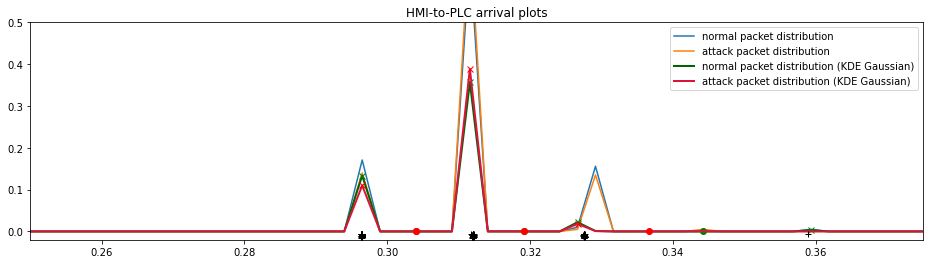

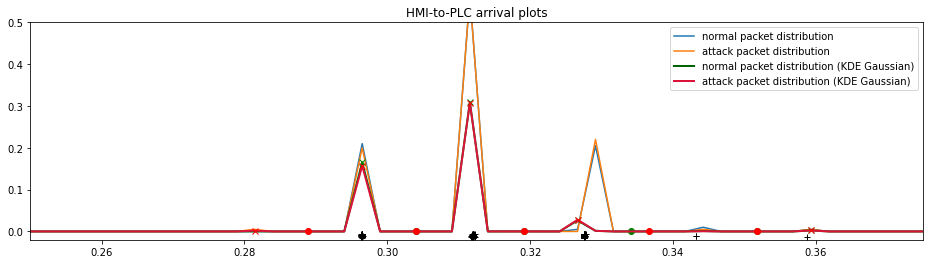

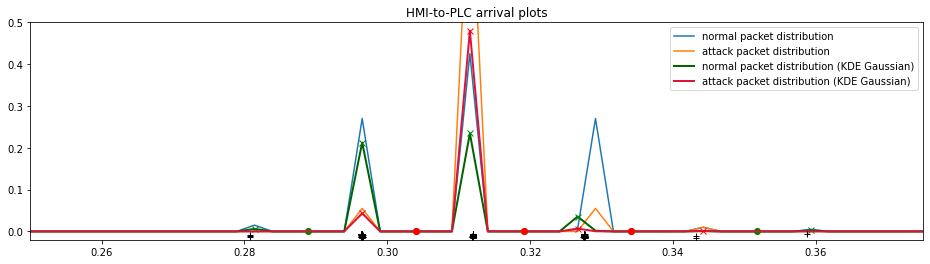

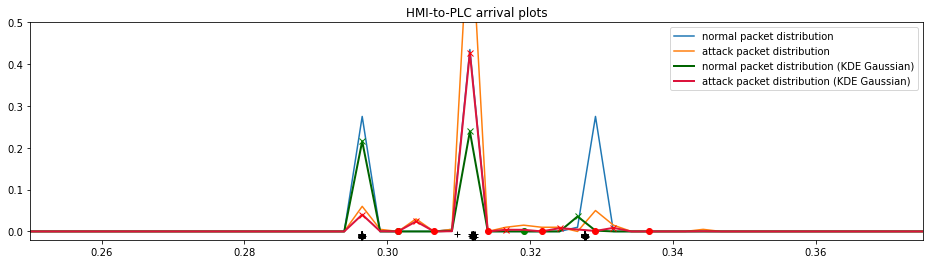

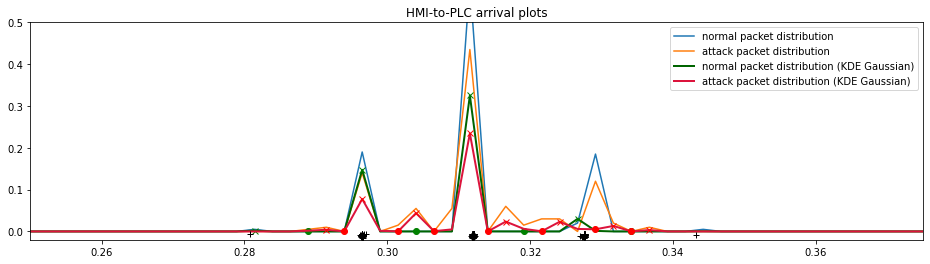

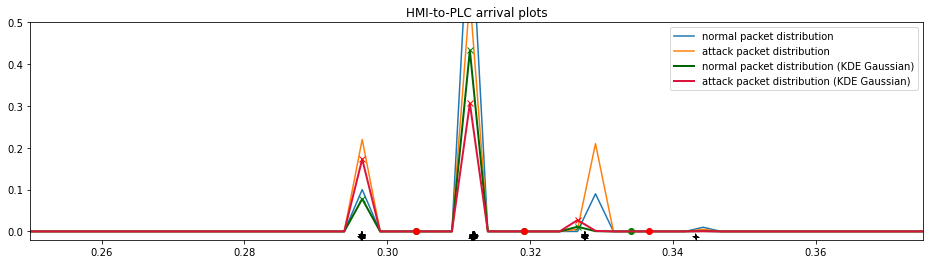

In [34]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example
for k in range(7):
    
    maxrange = 0.5
    N = 200
    fold = k*N
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
    #                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    X = normal_hmi_diff[fold:fold+N].reshape(-1,1)
    print("Time monitoring in seconds : ",sum(X))
    X_beta = attack_hmi_diff[fold:fold+N].reshape(-1,1)
    X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
    #             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

    hist, bin_edges = np.histogram(normal_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    bin_edges = bin_edges[:-1]
    true_dens = hist[:]*maxrange*(1/N)
    #print(true_dens)
    print(np.sum(true_dens))

    _hist, _bin_edges = np.histogram(attack_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    _bin_edges = _bin_edges[:-1]
    _true_dens = _hist[:]*maxrange*(1/N)
    #print(_true_dens)
    print(np.sum(_true_dens))

    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution')
    ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution')

    kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
    log_dens = kde.score_samples(X_plot)
    dens = np.exp(log_dens)/1000
    peaks, _ = find_peaks(dens, height=0.001)

    valleys, _ = find_peaks(1-dens, height=-0.002)

    _kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
    _log_dens = _kde.score_samples(X_plot)
    _dens = np.exp(_log_dens)/1000
    _peaks, __ = find_peaks(_dens, height=0.001)

    _valleys, __ = find_peaks(1-_dens, height=-0.002)

    ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
            linestyle='-', label='normal packet distribution (KDE Gaussian)')
    ax.plot(X_plot[peaks],dens[peaks], "gx")
    ax.plot(X_plot[valleys],dens[valleys], "go")
    ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
            linestyle='-', label='attack packet distribution (KDE Gaussian)')
    ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
    ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
    print("normal peaks time",X[peaks])
    #print("normal valleys time",X_beta[valleys])
    print("attack peaks time",X[_peaks])
    #print("attack valleys time",X_beta[_valleys])
    print("normal peaks density",dens[peaks])
    #print("normal valleys density",dens[valleys])
    print("attack peaks density",_dens[_peaks])
    #print("attack valleys density",_dens[_valleys])
    ax.title.set_text("HMI-to-PLC arrival plots")
    #print("relative",dens[peaks][:2]/_dens[_peaks][:2])
    #print("relative",dens[valleys][:2]/_dens[_valleys][:2])
    #print("Cycle gaps", np.diff(X[peaks]))
    #print("Cycle gaps", np.diff(X_beta[_peaks]))
    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.legend(loc='upper right')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(0.25, 0.375)
    ax.set_ylim(-0.02, 0.5)
